In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/sc_splicing_regulation/utils/')
from utils_functions import *
from statsmodels.stats.multitest import multipletests


In [5]:
weyn_pvals = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_pvals.tab', sep='\t', index_col=0)
weyn_fdr = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_fdr.tab', sep='\t', index_col=0)
weyn_psi = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_psi.tab', sep='\t', index_col=0)

weyn_ds = get_averages_bulk(weyn_psi)


In [12]:
tiklova_PSI = pd.read_csv('mouse_brain_development/data/preprocess/tables/psi.tab.gz', sep='\t', index_col=0)
tiklova_meta = pd.read_csv('mouse_brain_development/data/SraRunTable.txt.gz', sep=',', index_col=0)
tiklova_psix = pd.read_csv('mouse_brain_development/psix_object/psix_results.tab.gz', sep='\t', index_col=0)

In [23]:
e13 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 13.5'] & tiklova_PSI.columns
e15 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 15.5'] & tiklova_PSI.columns
e18 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 18.5'] & tiklova_PSI.columns
p1 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 1'] & tiklova_PSI.columns
p7 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 7'] & tiklova_PSI.columns
p90 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 90'] & tiklova_PSI.columns

tiklova_labels = [e13, e15, e18, p1, p7, p90]
from scipy.stats import kruskal

def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi.loc[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in exon_list:
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output

tiklova_kw = run_kw_dset(tiklova_PSI, tiklova_labels, tiklova_psix.index)

In [16]:
tiklova_gearyc = pd.read_csv('mouse_brain_development/geary_c/GearyC_k100.tab', sep='\t', index_col=0)

In [20]:

tiklova_gearyc['qvals'] = multipletests(tiklova_gearyc.pvals, method='fdr_bh')[1]

In [30]:
one_v_one = 'mouse_brain_development/brie2/'
tiklova_0v1 = pd.read_csv(one_v_one + 'brie_output_E13_v_E15/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v2 = pd.read_csv(one_v_one + 'brie_output_E13_v_E18/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v3 = pd.read_csv(one_v_one + 'brie_output_E13_v_P1/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v4 = pd.read_csv(one_v_one + 'brie_output_E13_v_P7/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v5 = pd.read_csv(one_v_one + 'brie_output_E13_v_P90/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)

tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_FDR
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_FDR
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_FDR
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_FDR
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_FDR
tiklova_ovo = tiklova_one_v_one.min(axis=1)

# tiklova_one_v_one = pd.DataFrame()
# tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_pval
# tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_pval
# tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_pval
# tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_pval
# tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_pval
# tiklova_ovo = tiklova_one_v_one.min(axis=1)

In [39]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score

weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.05)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.2) | (weyn_fdr.min(axis=1) > 0.05)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(500)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list((tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int)) + list((tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc_auc.append(f1)

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list((tiklova_psix.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_psix.loc[neg_choice].qvals <= 0.05).astype(int))
    psix_auc.append(f1_score(y, psix_y))
    

    kw_y = list((tiklova_kw.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_kw.loc[neg_choice].qvals <= 0.05).astype(int))
    kw_auc.append(f1_score(y, kw_y))
    

    r_y = list((tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]<=0.05).astype(int)) + list((tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]]<=0.05).astype(int))
    brie_l_auc.append(f1_score([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y))
    #####




100%|██████████| 500/500 [00:12<00:00, 41.23it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

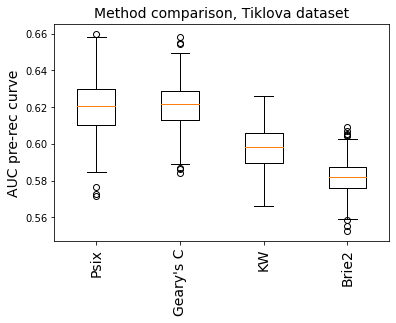

In [40]:
tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc, brie_l_auc]

# kw_auc = []
# psix_auc = []
# gearyc_auc = []
# briep_auc = []
# brie_l_auc = []

bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 5), 
           ['Psix', "Geary's C", 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

In [41]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [42]:
tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_ELBO_gain
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_ELBO_gain
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_ELBO_gain
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_ELBO_gain
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_ELBO_gain
tiklova_ovo = tiklova_one_v_one.max(axis=1)

In [49]:


weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.05)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.2) | (weyn_fdr.min(axis=1) > 0.05)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(500)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list(tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].C_score) + list(tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].C_score)
    pre, rec, thres = precision_recall_curve(y, c_y)
    gearyc_auc.append(auc(rec, pre))

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list(tiklova_psix.loc[pos_choice].psix_score) + list(tiklova_psix.loc[neg_choice].psix_score)
    pre, rec, thres = precision_recall_curve(y, psix_y)
    psix_auc.append(auc(rec, pre))
    

    kw_y = list(tiklova_kw.loc[pos_choice].KW_score) + list(tiklova_kw.loc[neg_choice].KW_score)
    pre, rec, thres = precision_recall_curve(y, kw_y)
    kw_auc.append(auc(rec, pre))
    

    r_y = list(tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]) + list(tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]])
    pre, rec, thres = precision_recall_curve([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y)
    brie_l_auc.append(auc(rec, pre))
    #####




100%|██████████| 500/500 [00:09<00:00, 55.06it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

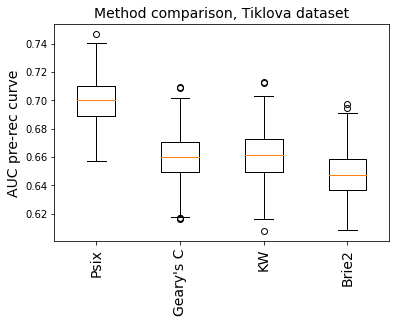

In [50]:
tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc, brie_l_auc]

# kw_auc = []
# psix_auc = []
# gearyc_auc = []
# briep_auc = []
# brie_l_auc = []

bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 5), 
           ['Psix', "Geary's C", 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)